**Маркетинговая аналитика Яндекс.Афиши**

Цель: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:

- лог сервера с данными о посещениях сайта Яндекс.Афиши,

- выгрузка всех заказов за этот период,

- статистика рекламных расходов.

Необходимо изучить:

- как клиенты пользуются сервисом,

- когда делают первые покупки на сайте,

- сколько денег приносит компании каждый клиент,

- когда расходы на привлечение клиента окупаются.

*Выручка измеряется в условных единицах — у.е.

## Открытие файла с данными и изучение общей информации <a name="step1"></a>

Для того, чтобы начать исследование, необходимо установить используемые в работе библиотеки:

In [1]:
pip install -U seaborn --quiet 

Note: you may need to restart the kernel to use updated packages.


In [2]:
#установим библиотеки, необходимые для исследования
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy import stats as st
import math
import seaborn as sns
import warnings
#устраним появляющиеся системные соообщения
warnings.filterwarnings('ignore')

In [3]:
#прочтем файлы с исходным данными и запишем их в датафреймы
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')
#посмотрим на исходные данные
dfs = [[visits, 'визиты'], [orders, 'заказы'], [costs, 'расходы']]
for df in dfs:
    print('\n-------------------------------- датафрейм', df[1], '--------------------------------\n')
    display(df[0].head())
    print('\n-------------------------------- информация', df[1], '--------------------------------\n')
    print(df[0].info())


-------------------------------- датафрейм визиты --------------------------------



,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485



-------------------------------- информация визиты --------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

-------------------------------- датафрейм заказы --------------------------------



,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247



-------------------------------- информация заказы --------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

-------------------------------- датафрейм расходы --------------------------------



,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15



-------------------------------- информация расходы --------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


На этапе визуального изучения выявлено разнорегистровое название стролбцов с пробелами - для удобства дальнешего обращения к столбцам и избежания ошибок переименуим их. Также выявлено несоответсвии типов дат формату дат.

In [4]:
#переведем названия столбцов в удобный вид
visits = visits.rename(columns={'Device': 'device', 'End Ts': 'end_ts','Source Id': 'source_id','Start Ts': 'start_ts','Uid': 'uid'})
orders = orders.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue','Uid': 'uid'})
costs = costs.rename(columns={'source_id': 'source_id', 'dt': 'date','costs': 'costs'})

#приведем формат дат в правильный тип данных
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d')

### Вывод <a name="step1.1"></a>

На этом этапе мы визуально оценили корректность данных, произвели замену названий столбцов для дальнейшего избежания ошибок, а также привели даты к правильному типу данных.

## Рассчет метрик и построение графиков <a name="step2"></a>

На даннном этапе нам предстоит посчитать метрики трёх видов и отобразить их на графиках во времени:

- продуктовые,

- метрики электронной коммерции,

- маркетинговые.

### Продуктовые метрики <a name="step2.1"></a>

#### Сколько людей пользуются продуктом в день, неделю, месяц. 

Для этого необходимо рассчитать метрики DAU, WAU и MAU, вычислить средние значения этих метрик за весь период, а также построить график изменения метрик во времени.

In [5]:
#выделим в отдельные столбцы год, месяц и неделю, а также полную дату 
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits['session_date'] = pd.to_datetime(visits['session_date'], format = '%Y-%m-%d')

# сгруппируем данные по уникальным пользователям и найдём среднее
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

# выведем метрики
print('количество визитов всего -', visits['uid'].count())
print('доля уникальных пользователей', ((visits['uid'].nunique()/visits['uid'].count())*100).round(1),'%')
print('количество уникальных пользователей в день -', int(dau_total))
print('количество уникальных пользователей в неделю -', int(wau_total)) 
print('количество уникальных пользователей в месяц -', int(mau_total)) 

количество визитов всего - 359400
доля уникальных пользователей 63.5 %
количество уникальных пользователей в день - 907
количество уникальных пользователей в неделю - 5716
количество уникальных пользователей в месяц - 23228


Количество уникальных посетителей находится на достаточном уровне, чтобы можно было судить, что продуктом интересуются не только те, кто с ним уже знаком.

Посмотрим на ещё одну метрику — sticky factor (англ. «липкий фактор»). Рассчитаем её по формуле sticky factor = DAU/WAU или sticky factor = DAU/MAU. С помощью неё можно посчитать регулярность использования продукта — то, как часто пользователи к нему обращаются.

In [6]:
# посчитаем sticky factor
sticky_mau = (dau_total/mau_total)*100
sticky_wau = (dau_total/wau_total)*100
# выведем метрики
print('sticky factor по отношению к недельной аудитории -',sticky_wau.round(1))
print('sticky factor по отношению к месячной аудитории -',sticky_mau.round(1))

sticky factor по отношению к недельной аудитории - uid    15.9
dtype: float64
sticky factor по отношению к месячной аудитории - uid    3.9
dtype: float64


sticky factor позволяет судить о лояльности и вовлеченности аудитории в продукт.

Визуализируем полученные данные, чтобы посмотреть динамику изменений количества уникальных посетителей сервиса.

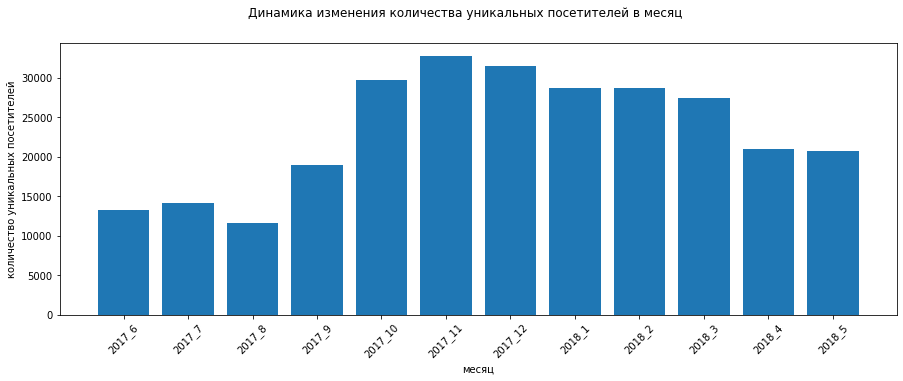

In [7]:
# произведем группировку для визуальзации
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
mau = mau.assign(date = mau.session_year.astype(str) + '_' + mau.session_month.astype(str))
# построим график
plt.figure(figsize =(15,5))
plt.bar(mau['date'], mau['uid'])
plt.suptitle('Динамика изменения количества уникальных посетителей в месяц')
plt.ylabel('количество уникальных посетителей')
plt.xlabel('месяц')
plt.xticks(mau['date'], rotation=45)
plt.show()

С сентября 2017 года на протяжении 6 месяцев наблюдатся значительный и постоянный прирост уникальных посетителей, однако с апреля 2018 года количество уникальных посетителей в месяц снизилась. Посмотрим как изменялось количество уникальных посетителей в разрезе недель.

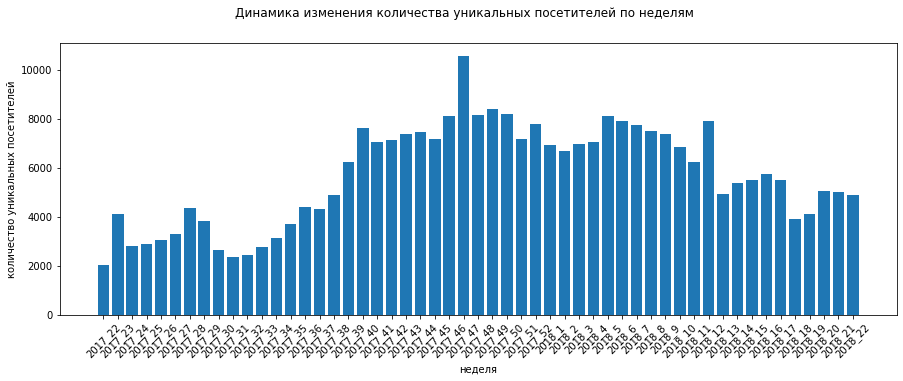

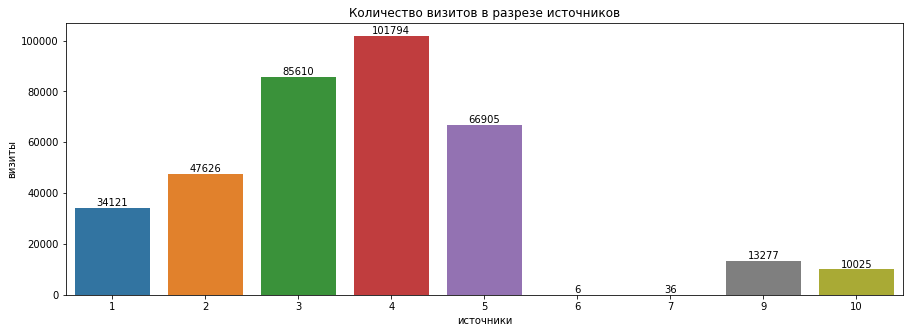

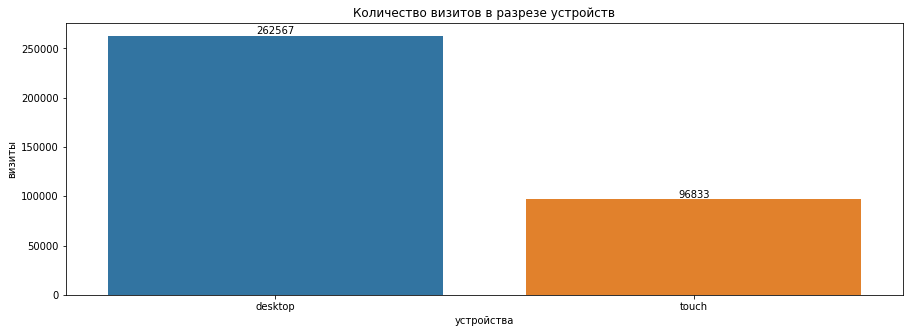

In [8]:
# произведем группировку для визуализации
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
wau = wau.assign(date = wau.session_year.astype(str) + '_' + wau.session_week.astype(str))
# построим график
plt.figure(figsize =(15,5))
plt.bar(wau['date'], wau['uid'])
plt.suptitle('Динамика изменения количества уникальных посетителей по неделям')
plt.ylabel('количество уникальных посетителей')
plt.xlabel('неделя')
plt.xticks(wau['date'], rotation=45)
plt.show()

# сгруппируем визиты по источникам и посчитаем среднюю продолжительность сессии в них
visits_from_source = visits.groupby(['source_id']).agg({'uid': 'count'}).reset_index()
# построим график
plt.figure(figsize=(15,5))
sns.barplot(x='source_id', y='uid', data=visits_from_source)
for i, val in enumerate(visits_from_source['uid'].values):
        plt.text(i, val, int(val), horizontalalignment='center', 
                 verticalalignment='bottom', fontdict={'fontweight':500, 'size':10})
plt.title('Количество визитов в разрезе источников')
plt.xlabel('источники')
plt.ylabel('визиты')
plt.show()

# сгруппируем визиты по устройствам и посчитаем среднюю продолжительность сессии в них
visits_from_device = visits.groupby(['device']).agg({'uid': 'count'}).reset_index()
# построим график
plt.figure(figsize=(15,5))
sns.barplot(x='device', y='uid', data=visits_from_device)
for i, val in enumerate(visits_from_device['uid'].values):
        plt.text(i, val, int(val), horizontalalignment='center', 
                 verticalalignment='bottom', fontdict={'fontweight':500, 'size':10})
plt.title('Количество визитов в разрезе устройств')
plt.xlabel('устройства')
plt.ylabel('визиты')
plt.show()

Рост количества уникальных посетителей наблюдается с 38 недели 2017 года, пик посещаемости уникальными пользователями пришелся на 46 неделю 2017 года. Можно предположить, что повышение заинтересованности новыми пользователями продуктом может быть обусловлено сезонным фактором в связи со смецификой сервиса - люди в холодное время года предпочитают проводить досуг в определенным помещениях, для этого им нужно быть в курсе всех мероприятий. Возможно причиной роста посещаемости могли стать успешные запуски рекламных кампаний. С десктопной версии заходят 73% посетителей.

#### Сколько сессий происходит в день.

Необходимо определить сколько раз за день пользователи в среднем заходят на сайт, и как изменяется эта метрика с течением времени.

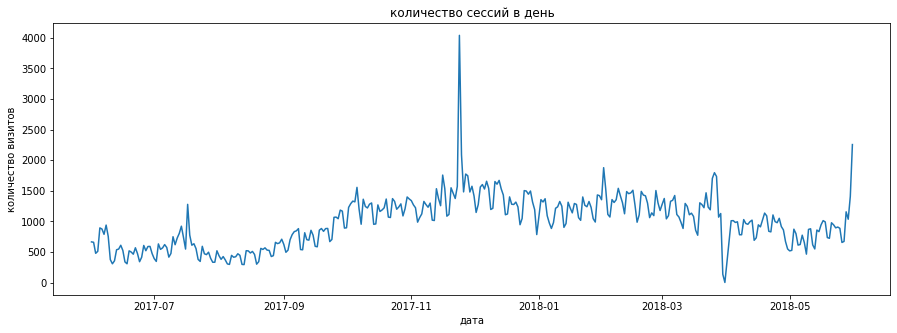

cреднее количество сессий в день - 987.0
максимальное количество сессий в день - 4042


,session_date,uid
176,2017-11-24,4042


,session_date,uid
303,2018-03-31,1


In [9]:
# сгруппируем данные о визитах по дате и посчитаем количество визитов
session_per_day = visits.groupby(['session_date']).agg({'uid': 'count'}).reset_index()

# построим график 
plt.figure(figsize=(15,5))
sns.lineplot(data=session_per_day, x='session_date', y='uid', sort=True)
plt.title('количество сессий в день')
plt.xlabel('дата')
plt.ylabel('количество визитов')
plt.show()

# выведем cреднее количество сессий в день
print('cреднее количество сессий в день -',session_per_day['uid'].mean().round(0))
print('максимальное количество сессий в день -',session_per_day['uid'].max().round(0))
#найдем дату максимального и минимального количества сессий
display(session_per_day.loc[session_per_day['uid'] == session_per_day['uid'].max()])
display(session_per_day.loc[session_per_day['uid'] == session_per_day['uid'].min()])

**987 раз** - столько раз **в среднем за день совершается пользовательских сессий на сайте Яндекс.Афиша**. Чаще всего пользователи заходили в предновогодние праздники в ноябре 2017 года - пик 4042 сессий в день (24 ноября 2017 года). Это можно связать с активным поиском предновогоднего досуга. Активность повышается в холодные месяцы года (осень - зима), что связанно с сезонностью. Меньше всего автивности наблюдается в летнее время. Однако по графику также можно отметить резкий провал посещаемости 31 марта 2018 года до одного посещения за сутки - можем предположить, что данное явления связано с технической ошибкой работы сервиса.

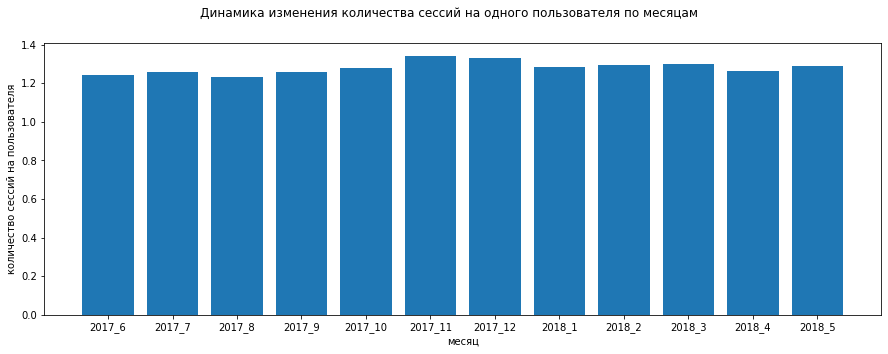

cреднее количество сессий в день на одного пользователя - count    12.000000
mean      1.280889
std       0.032217
min       1.234202
25%       1.259190
50%       1.281448
75%       1.294672
max       1.340641
Name: sessions_per_user, dtype: float64


In [10]:
# # создадим столбец с годом и месяцем визитов
# visits = visits.assign(year_month = visits.session_year.astype(str) + '_' + visits.session_month.astype(str))
# # visits = visits.assign(year_week = visits.session_year.astype(str) + '_' + visits.session_week.astype(str))
# найдем с помощью группировки количество сессий на одного пользования в разрезе месяцев
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg({'uid': ['count','nunique']}).reset_index()
sessions_per_user = sessions_per_user.assign(date = sessions_per_user.session_year.astype(str) + '_' + sessions_per_user.session_month.astype(str))
sessions_per_user.columns = ['session_year', 'session_month', 'n_sessions', 'n_users', 'date']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
# построим график
plt.figure(figsize =(15,5))
plt.bar(sessions_per_user['date'], sessions_per_user['sessions_per_user'])
plt.suptitle('Динамика изменения количества сессий на одного пользователя по месяцам')
plt.ylabel('количество сессий на пользователя')
plt.xlabel('месяц')
plt.show()

#найдем средний показатель числа сессий на пользователя
print('cреднее количество сессий в день на одного пользователя -',sessions_per_user['sessions_per_user'].describe())

В среднем количество сессий в день на одного пользователя в динамике не имеет сильных изменений. Показатель варьируется в промежутке от 1.2 до 1.3 сессий на пользователя в день. В среднем он равено 1.28 сессии в день на пользователя, что говорит о том, что пользователям хватает одной сессии за день, чтобы получить нужную информацию или услугу.

#### Сколько длится одна сессия.

На данном этапе необходимо исследовать сколько времени пользователи проводят на сайте, то есть посчитать среднюю продолжительность пользовательской сессии за весь период.

In [11]:
# найдем продолжительность сессии в секундах 
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
# посмотрим на среднюю продолжительность сессии в секундах
print('средняя продолжительность сессии в секундах -',visits['session_duration_sec'].mean()) 
# посмотрим на среднюю продолжительность сессии в минутах
print('средняя продолжительность сессии в минутах -',(visits['session_duration_sec'].mean())/60)
# посчитаем нулевые сессии
print('количество нулевых сессий -',np.sum(visits['session_duration_sec'] == 0))

средняя продолжительность сессии в секундах - 643.506488592098
средняя продолжительность сессии в минутах - 10.725108143201632
количество нулевых сессий - 35794


Средняя продолжительность сессии или ASL (англ. average session length) показывает, сколько длится сессия пользователя в среднем.
Чтобы найти ASL — посчитаем длину всех сессий и вычислим среднее.

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. 
Наше — не из таких, рассчитаем моду (значение в выборке, которое встречается чаще всего).

In [12]:
# выберем все не нулевые сессии для дальнейшего анализа
session_not_null = visits.loc[visits['session_duration_sec'] != 0]
# посчитаем ASL
asl = session_not_null['session_duration_sec'].mode()
print('максимально частая продолжительность сессии -', asl[0], 'секунд\n')
# посмотрим на количественные показатели 
print(session_not_null['session_duration_sec'].describe())

максимально частая продолжительность сессии - 60 секунд

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: session_duration_sec, dtype: float64


Успеть за 60 секунд или 1 минуту - так называется максимально частая продолжительность пользовательской сессии. Она значительно отличается от средней длины пользовательской сессии равной 10-11 минутам. 

Самая длинная пользовательская сессия зафиксирована на показателе 1408 минут или 23 часа, в то время как минимальная сессия длилась 19 секунд. Это аномальные сессии. Ввиду большого разброса длин стоит посмотреть на диаграмму размаха продолжительности пользовательской сессии.

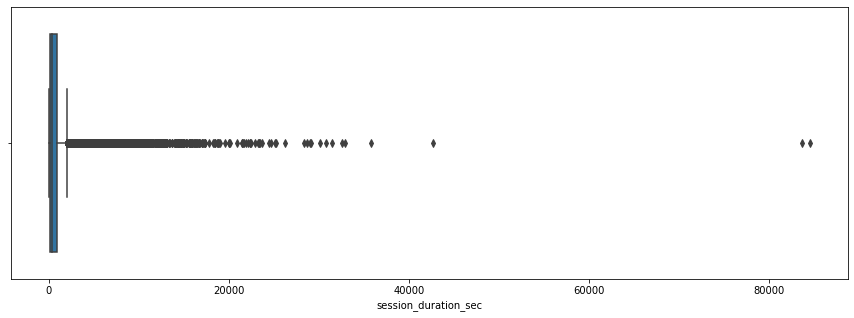

In [13]:
#построим диаграмму размаха 
fig, ax = plt.subplots(figsize = (15,5))
ax = sns.boxplot(session_not_null.session_duration_sec)

Можем отметить, что значения продолжительности сессии имеют много выбросов и для визуализации нам необходимо определить диапазон - до 3 квартиля - 900 секунд.

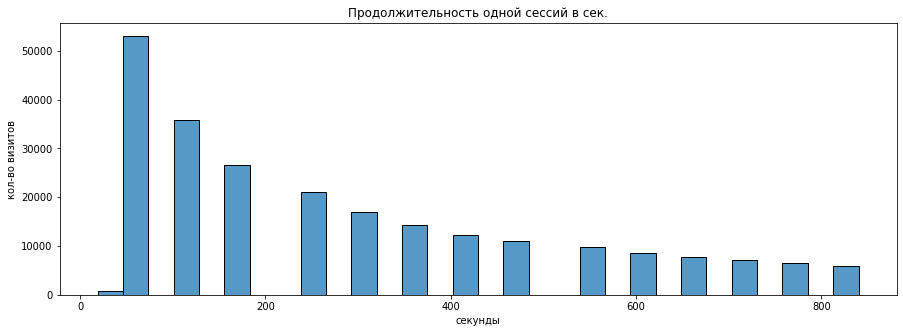

In [14]:
# определим диапазон для графика
session_for_hist = session_not_null.loc[session_not_null['session_duration_sec'] < 900]
# построим график
plt.figure(figsize=(15,5))
sns.histplot(data=session_for_hist, x='session_duration_sec', bins=30)
plt.title('Продолжительность одной сессий в сек.')
plt.xlabel('секунды')
plt.ylabel('кол-во визитов')
plt.show()

На графике мы также видим, что наиболее частая продолжительность сессии 60 секунд.

Посмотрим на продолжительность пользовательской сессии в разрезе источников прихода посетителей и их устройств.

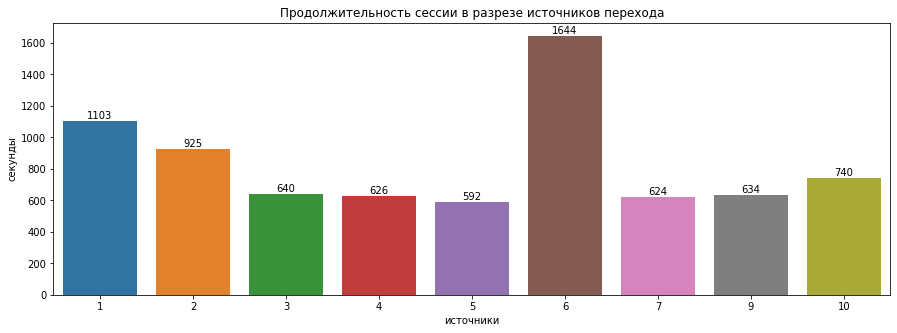

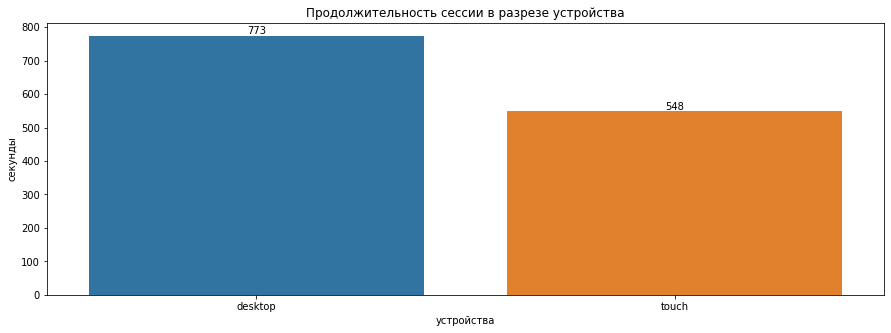

In [15]:
# сгруппируем визиты по источниками и посчитаем среднюю продолжительность сессии в них
session_for_source = session_not_null.groupby(['source_id']).agg({'session_duration_sec': 'mean'}).reset_index()
# построим график
plt.figure(figsize=(15,5))
sns.barplot(x='source_id', y='session_duration_sec', data=session_for_source)
for i, val in enumerate(session_for_source['session_duration_sec'].values):
        plt.text(i, val, int(val), horizontalalignment='center', 
                 verticalalignment='bottom', fontdict={'fontweight':500, 'size':10})
plt.title('Продолжительность сессии в разрезе источников перехода')
plt.xlabel('источники')
plt.ylabel('секунды')
plt.show()
# сгруппируем визиты по устройствам и посчитаем среднюю продолжительность сессии в них
session_for_device = session_not_null.groupby(['device']).agg({'session_duration_sec': 'mean'}).reset_index()
session_for_source = session_not_null.groupby(['source_id']).agg({'session_duration_sec': 'mean'}).reset_index()
# построим график
plt.figure(figsize=(15,5))
sns.barplot(x='device', y='session_duration_sec', data=session_for_device)
for i, val in enumerate(session_for_device['session_duration_sec'].values):
        plt.text(i, val, int(val), horizontalalignment='center', 
                 verticalalignment='bottom', fontdict={'fontweight':500, 'size':10})
plt.title('Продолжительность сессии в разрезе устройства')
plt.xlabel('устройства')
plt.ylabel('секунды')
plt.show()

Дольше всего сессия в среднем длится у пользователей пришедших из 6 источника - 1644 секунды или 27 минут, быстрее всех находят нужную информацию пользователи из 4,5 и 7 источников - им хватает 10 минут.

У пользователей десктопной версии сессия длится на 4 минуты дольше, чем у пользователей мобильной версии. Причина может крыться в разной верстке или в психологическом факторе - у пользователей с десктопа как правило больше времени на изучение информации.

#### Как часто люди возвращаются.

На данном этапе необходимо рассчитать Retention Rate, применяя когортный анализ.

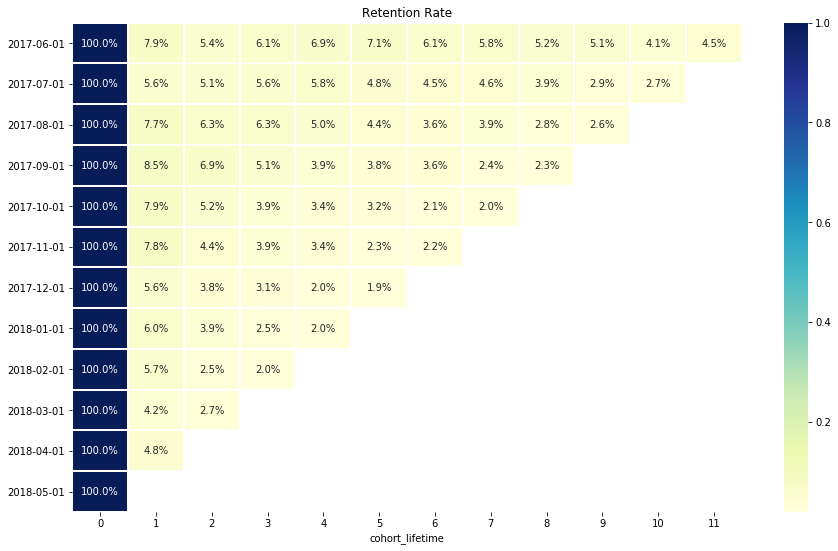

In [16]:
# для формирования когорт возьмём дату, когда пользователь впервые проявил активность 
first_visit = visits.groupby('uid')['start_ts'].min() 
first_visit.name = 'first_visit'
visits = visits.join(first_visit, on='uid')
# сформируем когорты по месяцам
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
# сгруппируем данные по когорте и lifetime 
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].apply(np.round).astype('int') 
# посчитаем для каждой когорты количество активных пользователей на определённую «неделю жизни»
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
# найдём исходное количество пользователей в когорте, возьмём их число на нулевую неделю
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
# переименуем столбец uid
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
# присоединим к cohorts с initial_users_count
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')
# рассчитаем Retention Rate -р азделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
# сгруппируем данные 
retention_pivot = cohorts.pivot_table(index='first_visit_month',
                                      columns='cohort_lifetime',values='retention',aggfunc='sum') 
# приведем даты в формат для визуализации
retention_pivot.index = retention_pivot.index.strftime('%Y-%m-%d')
# построим heatmap retention rate
plt.figure(figsize=(15, 9))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='white', cmap="YlGnBu")
sns.set(style='white')

В среднем только 7% пользователей возвращаются на сервис после первого месяца их визита. 

Retention Rate в первый месяц убывает по когортам с течением времени. Если для когорты пользователей, пришедших с июня по июль Retention Rate в первый месяц составляет 7,9%, то для пользователей, пришедших с июля по август — уже 5.6%. Так, за 6 недель коэффициент удержания упал с 7.9% до 6,1%. Это говорит, что с каждой новой когортой поведение пользователей меняется.

#### Вывод

На этапе рассчета продуктовых метрик было выявлено:

- **359 400 визитов** было совершено за исследуемый период, из них 63.5% составили уникальные пользователи. DAU = 907, WAU = 5716, MAU = 23 228. В динамике количество уникальных посетителей растет преимущественно в холодное время года, что может соответвовать сезонными факторами спроса на услуги сервиса. 73% посетителей заходят с десктопной версии;

- **987 раз** - столько раз **в среднем за день совершается пользовательских сессий на сайте Яндекс.Афиша**. Чаще всего пользователи заходили в предновогодние праздники в ноябре 2017 года - пик 4042 сессий в день (24 ноября 2017 года). В среднем на одного пользователя приходится 1.28 пользовательской сессии в день. Пользователям хватает одной сессии за день, чтобы получить нужную информацию или услугу;

- **60 секунд или 1 минуту** максимально частая продолжительность пользовательской сессии. Она значительно отличается от средней длины пользовательской сессии равной 10-11 минутам. Дольше всего сессия в среднем длится у пользователей пришедших из 6 источника - 1644 секунды или 27 минут, быстрее всех находят нужную информацию пользователи из 4,5 и 7 источников - им хватает 10 минут. У пользователей десктопной версии сессия длится на 4 минуты дольше, чем у пользователей мобильной версии. Причина может крыться в разной верстке или в психологическом факторе - у пользователей с десктопа как правило больше времени на изучение информации;

- только **7% пользователей** возвращаются на сервис после первого месяца их визита.

### Метрики электронной коммерции <a name="step2.2"></a>

#### Когда люди начинают покупать.

На данном этапе необходимо исследовать, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

In [17]:
# сгруппируем даты первого визита
first_session = visits.groupby('uid')['start_ts'].min()
first_session.name = 'first_session'
# сгруппируем даты первой покупки
first_buy = orders.groupby('uid')['buy_ts'].min()
first_buy.name = 'first_buy'
# объединим даты первого визита и даты первой покуки
orders_new = pd.merge(first_session,first_buy,on='uid').reset_index()
# посчитаем время прошедшее с визита до покупки в секундах
orders_new['time_session_buy'] = (orders_new['first_buy'] - orders_new['first_session']).dt.seconds
# переведем в минуты
orders_new['time_session_buy'] = orders_new['time_session_buy']/60
#выведем описание
print(orders_new['time_session_buy'].describe())
# посчитаем нулевые значения
print('\nколичество нулевых значений -',np.sum(orders_new['time_session_buy'] == 0))

count    36523.000000
mean       249.164691
std        429.742785
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: time_session_buy, dtype: float64

количество нулевых значений - 2467


Среди времени от захода на сайт до совершения покупки сущетсвуют нулевые значения - в случае если заход на сайт был совершен сразу на страницу оформления заказа, то наличие нулевого времени оправдано. В таком случае 2 467 заходов сразу привели к совершению покупок. Рассмотрим случай, когда эти заходы были технической ошибкой.

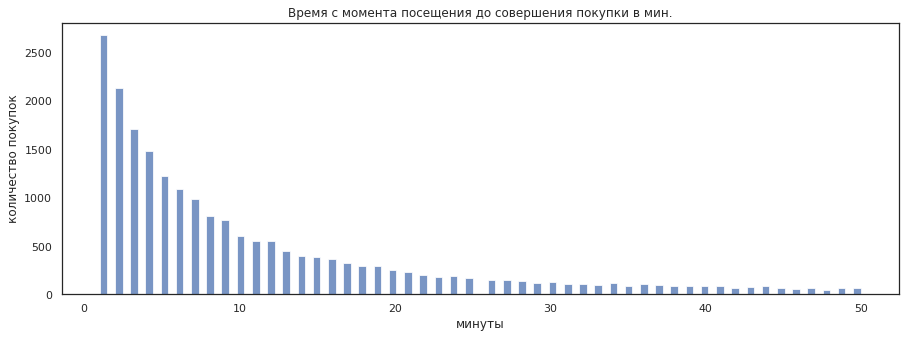

максимально частая продолжительность времени от захода на сервис до покупки - 1.0 минута

count    36523.000000
mean       249.164691
std        429.742785
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: time_session_buy, dtype: float64


In [18]:
# выберем данные без нулевых значений времени
orders_not_null = orders_new.loc[(orders_new['time_session_buy'] != 0) & (orders_new['time_session_buy'] <= 50)]

plt.figure(figsize=(15,5))
sns.histplot(data=orders_not_null, x='time_session_buy', bins=100)
plt.title('Время с момента посещения до совершения покупки в мин.')
plt.xlabel('минуты')
plt.ylabel('количество покупок')
plt.show()

print('максимально частая продолжительность времени от захода на сервис до покупки -', orders_new['time_session_buy'].mode()[0], 'минута\n')
# посмотрим на количественные показатели 
print(orders_new['time_session_buy'].describe())

1 минуты достаточно пользователям для совершения покупки - так показала мода - максимально часто встречаемое время в исследовании данного параметра. Если судить по медианному значению, то половине пользователей для совершения покупки достаточно 16 минут на сервисе. Также 5% пользователей совершивших заказ, начинали свою сессию с его оформления. Вполне вероятно, что именно эти пользователи перешли с рекламных объявлений на страницу заказа конкретного товара.

#### Сколько покупают за период.

С помощью применения когортного анализа, рассчитаем среднее количество покупок на одного клиента за определённый период, например за 6 месяцев.

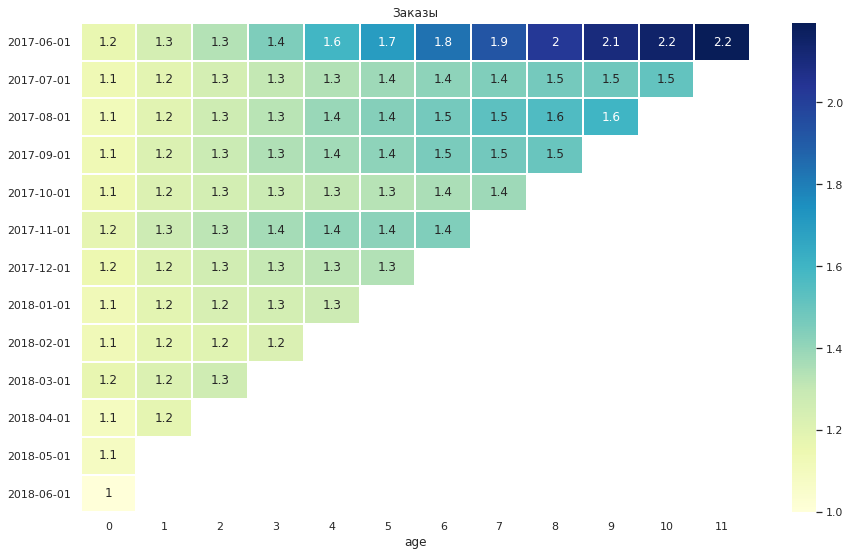

In [19]:
# найдем дату первой покупки каждого покупателя
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
# посчитаем количество новых покупателей за каждый месяц
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
# построим когорты - добавим месяц первой покупки каждого покупателя в таблицу с заказами
orders_new = pd.merge(orders,first_orders, on='uid')
# сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': ['sum', 'count']}).reset_index()
# добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
# построим отчет по заказам 
report['age'] = (report[('order_month',      '')] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['orders_per_buyer'] = report[('revenue', 'count')] / report['n_buyers']
# построим сводную таблицу
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='orders_per_buyer', 
        aggfunc='mean').cumsum(axis=1).copy()
# приведем дату для визуализации
output.index = output.index.strftime('%Y-%m-%d')
# построим heatmap orders
plt.figure(figsize=(15, 9))
plt.title('Заказы')
sns.heatmap(output, annot=True, linewidths=1, linecolor='white', cmap="YlGnBu")
sns.set(style='white')

8 месяцев понадобилось посетителю, сделавшему первый заказ, чтобы совершить повторный. Если брать в расчет период 6 месяцев, то можно отметить тенденцию к накоплению количества заказов в разрезе на одного пользователя.

#### Какой средний чек.

Рассчитаем среднюю выручку с пользователя, посмотрим динамику изменений этой метрики во времени.

средний чек - 4.3 у.е.



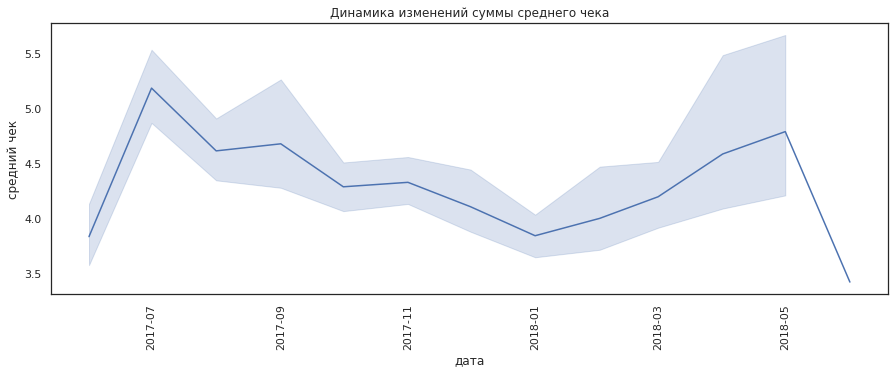

In [20]:
# посчитаем средний чек с помощью группировки
mean_check = orders.groupby(['order_month', 'uid']).agg({'revenue': 'mean'})
print('средний чек -', mean_check.mean()[0].round(1), 'у.е.\n')

#  визуализируем динамику
plt.figure(figsize=(15,5))
sns.lineplot(data=mean_check, x='order_month', y='revenue', sort=False)
plt.title('Динамика изменений суммы среднего чека')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.xticks(rotation=90)
plt.show()

4.3 у.е. - средний чек одного покупателя на сервисе. В динамике средний чек увеличивается увеличивался в летний период и падал в зимний. Вполне вероятно, что снижению суммы чека способствовали серзонные факторы или проводимые в этот период акции.

#### Сколько денег приносит пользователь. (LTV)

На данном этапе необходимо выяснить, как меняется во времени накопительный LTV по когортам, а также средний LTV по когортам за 6 месяцев.

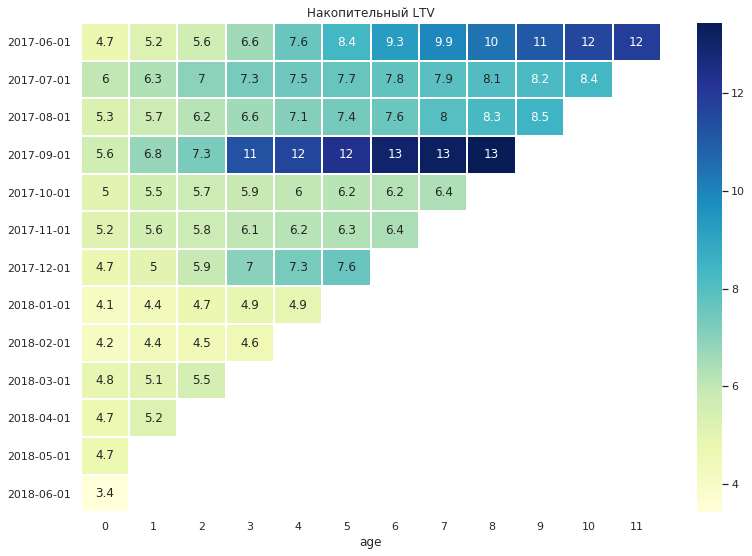

In [21]:
# произведем группировку дат для определения когорт
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
# образуем когорты
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
# print(cohort_sizes)
# обозначим маржинальность 
margin_rate = 1 
# добавим месяц первого заказа к покупкам
orders_first_month = pd.merge(orders,first_orders, on='uid')
# группируем когорты
cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
# посчитаем валовую прибыль
report['gp'] =  report['revenue'] * margin_rate
# расчет возраста когорты
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
# расчет LTV когорт
report['ltv'] = report['gp'] / report['n_buyers'] 
# создание сводной таблицы
result = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='sum').cumsum(axis=1).copy()
# приведем дату для визуализации
result.index = result.index.strftime('%Y-%m-%d')
# визуализируем данные
plt.figure(figsize=(13, 9))
plt.title('Накопительный LTV')
sns.heatmap(result, annot=True, linewidths=1, linecolor='white', cmap="YlGnBu")
sns.set(style='white')
plt.show()
# result = report.pivot_table(
#         index='first_order_month', 
#         columns='age', 
#         values='ltv', 
#         aggfunc='sum')
# # приведем дату для визуализации
# result.index = result.index.strftime('%Y-%m-%d')
# # визуализируем данные
# plt.figure(figsize=(13, 9))
# plt.title('Средний LTV')
# sns.heatmap(result, annot=True, linewidths=1, linecolor='white', cmap="YlGnBu")
# sns.set(style='white')
# plt.show()

На 6 месяц жизни покупатель как правило увеличивает LTV в 1,5 раза с суммы первоначальной покупки, а к концу 11 месяца его LTVм может увеличиться в 3 раза от среднего чека (по данным когорты июня 2017 года). Также стоит отметить когорту сентября 2017 года, LTV которой значительно возрос начиная с 3 месяца жизни. Все когорты на протяжении времени имеют положительное накопление и в средне прирост от каждого месяца равен 0.3 у.е.

#### Вывод

На этапе рассчета метрик электронной коммерции было выявлено:

- **1 минута** необходима пользователям для совершения покупки (максимально часто встречаемое время в исследовании данного параметра). Половине пользователей от захода на сервис до перехода к оформлению заказа достаточно 16 минут. Также 5% пользователей совершивших заказ, начинали свою сессию с его оформления. Вполне вероятно, что эти пользователи перешли с рекламных объявлений;

- **8 месяцев** понадобилось посетителю, сделавшему первый заказ, чтобы совершить повторный. Если брать в расчет период 6 месяцев, то можно отметить тенденцию к накоплению количества заказов в разрезе одного пользователя;

- **4.3 у.е.** - средний чек одного покупателя на сервисе. В динамике средний чек увеличивается в летний период и падает в зимний. Вполне вероятно, что снижению суммы чека способствовали сезонные факторы или проводимые в этот период акции;

- на **6 месяц** жизни покупатель как правило увеличивает LTV в 1,5 раза с суммы первоначальной покупки, а к концу 11 месяца его LTVм может увеличиться в 3 раза от среднего чека (по данным когорты июня 2017 года).

### Маркетинговые метрики <a name="step2.3"></a>

#### Сколько денег потратили на маркетинг.

На данном этапе необходимо посчитать общую сумму расходов на маркетинг и выяснить, как траты распределены по источникам и как меняется это распределение во времени.

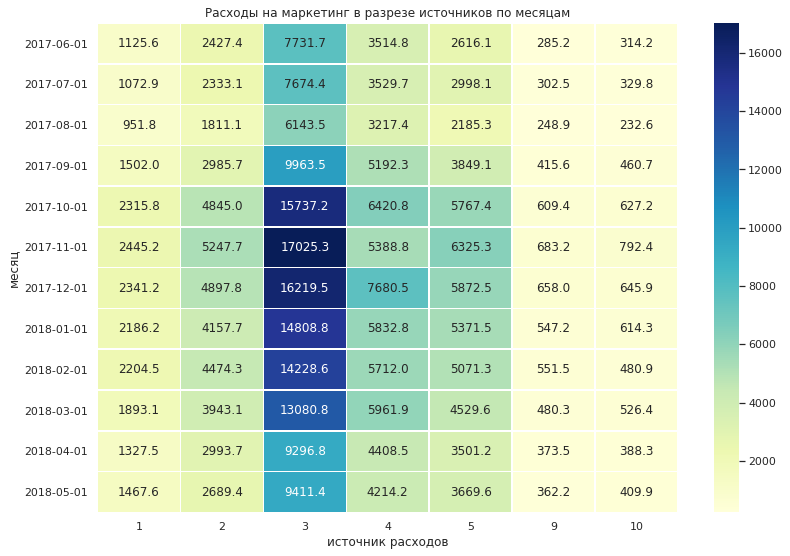

In [22]:
costs['costs_month'] = costs['date'].astype('datetime64[M]')
# посчитаем расходы на маркетинг в разрезе источников по месяцам 
costs_source_month = costs.pivot_table(index='costs_month',
                                      columns='source_id',values='costs',aggfunc='sum') 
# приведем формат дат для визуализации
costs_source_month.index = costs_source_month.index.strftime('%Y-%m-%d')
# визуализируем данные
plt.figure(figsize=(13, 9))
sns.heatmap(costs_source_month, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")
plt.title('Расходы на маркетинг в разрезе источников по месяцам')
plt.ylabel('месяц')
plt.xlabel('источник расходов')
plt.show()

Наибольшие бюджеты выделяются на 2, 3 и 4 источники, в то время как на 9 и 10 источники расходы в совокупности не превышают и 10% от расходов на 3 источник. Увеличение расходов на маркетинг началось с октября 2017 года и закончилось в апреле 2018 года, что свидетельствует о запуске акций для привлечения и поддержания активности пользователей в высокий сезон.

#### Сколько стоило привлечение одного покупателя из каждого источника. (CAC)

На данном этапе необходимо рассчитать CAC. Для этого определим, сколько стоит привлечение одного покупателя из каждого источника трафика.

In [23]:
# узнаем с какого источника пришел клиент 
visits['first_visit'] = visits['start_ts'].astype('datetime64[D]')
first_visits = visits.groupby(['first_visit', 'uid']).agg({'source_id': 'first'}).reset_index()
first_visits.columns = ['date', 'uid', 'source_id']
# далее нужно добавить в заказы ДАТУ (не месяц) первого заказа
first_orders = orders.groupby(['uid']).agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_orders']
first_orders.name = 'first_orders'
orders_new = pd.merge(orders, first_orders, on='uid', how = 'left')
orders_new['first_orders'] = orders_new['first_orders'].astype('datetime64[D]')
orders_new = orders_new[['revenue','uid','first_orders']]
orders_new.columns = ['revenue', 'uid', 'date']
# print(orders_new)
# print(first_visits)

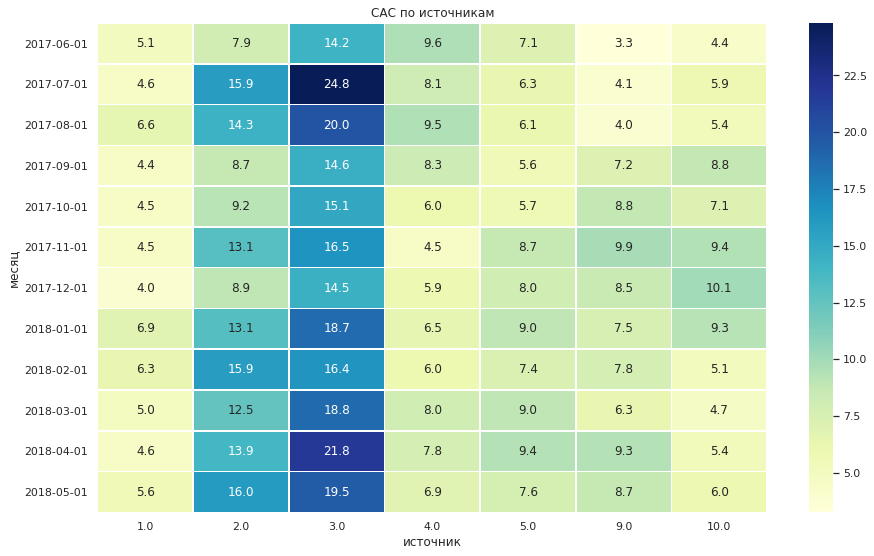

In [24]:
# соединим визиты с заказами
visits_orders = pd.merge(orders_new, first_visits, on=['uid', 'date'], how = 'left')
# группируя по этой дате и первым источникам сформировать когорты покупателей в день
cohorts_orders = visits_orders.groupby(['source_id', 'date']).agg({'uid': 'count', 'revenue': 'sum'}).reset_index()
cohorts_orders.columns = ['source_id', 'date', 'n_buyers', 'revenue']
# далее это мерджим с расходами, а расходы уже не надо предварительно группировать, т.к. 
#тоже разбиты на дни, т.е. содержит столбцы с датой и источниками, поэтому по этой дате и источникам и мерджим
orders_costs = pd.merge(cohorts_orders, costs, on=['source_id', 'date'])
report = orders_costs[['source_id','date','n_buyers', 'revenue', 'costs']]
# после делим расходы на количество покупателей и получаем САС  
report['cac'] = report['costs'] / report['n_buyers']
# добавим столбец с месяцами
report['month'] = report['date'].astype('datetime64[M]')
# print(report)
#сгруппируем вывод 
output = report.pivot_table(
        index='month', 
        columns='source_id', 
        values='cac', 
        aggfunc='mean')

# приведем формат дат для визуализации
output.index = output.index.strftime('%Y-%m-%d')

# визуализируем данные
plt.figure(figsize=(15, 9))
sns.heatmap(output, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")
plt.title("CAC по источникам")
plt.ylabel('месяц')
plt.xlabel('источник')
plt.show()

Самые "дорогие" покупатели приходят из источников 2 и 3  (напомним, что 3 источник лидер по бюджету на привлечение). Остальные покупатели равнозначно стоят из любого источника. Самые "дешевые" приходили из девятого источника в первых трех когортах.

#### Насколько окупились расходы. (ROMI)

Рассчитаем ROMI (LTV/CAC) по когортам в разрезе источников и сравним окупаемость за одинаковые периоды жизни когорт.

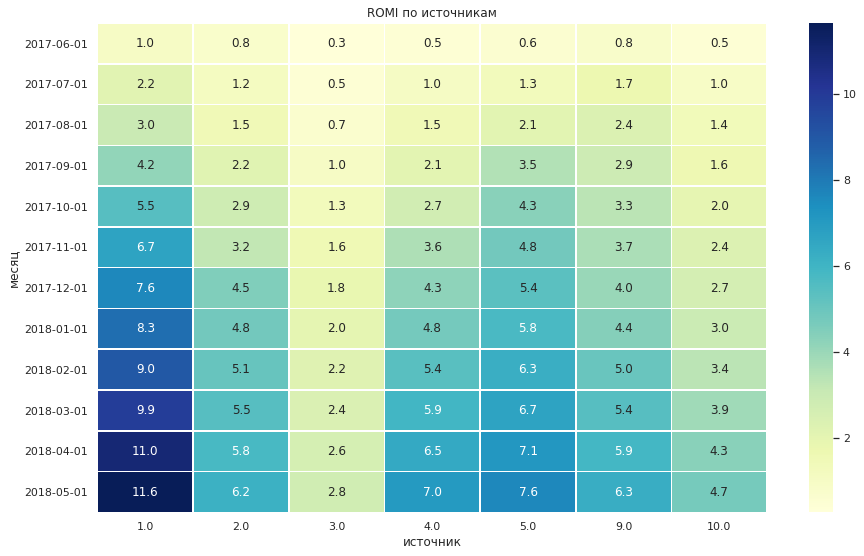

In [25]:
# посчитаем валовую прибыль
report['gp'] = report['revenue'] * margin_rate
# рассчитаем LTV
report['ltv'] = report['gp']/report['n_buyers']

report = report.groupby(['source_id', 'month']).agg({'cac': 'sum', 'ltv': 'sum'}).reset_index()

# рассчитаем ROMI
report['romi'] = report['ltv']/report['cac']

# создадим сводную таблицу
output = report.pivot_table(
        index='month', 
        columns='source_id', 
        values='romi', 
        aggfunc='mean').cumsum(axis=0).copy()
# приведем формат дат для визуализации
output.index = output.index.strftime('%Y-%m-%d')
# визуализируем данные
plt.figure(figsize=(15, 9))
sns.heatmap(output, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")
plt.title("ROMI по источникам")
plt.ylabel('месяц')
plt.xlabel('источник')
plt.show()

Согласно рассчету ROMI кампании по источникам 1, 2, 4 и 5 самая высокая окупаемость. По 3  источнику привлечения пользователей - лидеру по бюджету на маркетинг - кампания показала самую низкую окупаемость по всем когортам без исключения. 

#### Вывод

На этапе рассчета маркетинговых метрик было выявлено:

- наибольшие бюджеты выделяются на 3, 4 и 5 источники, в то время как на 9 и 10 источники расходы в совокупности не превышают и 10% от расходов на 3 источник. Увеличение расходов на маркетинг началось с октября 2017 года и закончилось в апреле 2018 года, что свидетельствует о запуске акций для привлечения и поддержания активности пользователей в высокий сезон;

- самые "дорогие" покупатели приходят из источников 3,4 и 5. Самые "дешевые" покупатели приходят из источника 9, который имеет малые бюджеты. Однако 1 источник также дает недорогие показатели по привлечению посетителей, в то время как имеет средние расходы на маркетинг;

- согласно рассчету ROMI кампании по источникам 9 и 10 окупились в наибольших случаях, нежели кампании по остальным источникам. По 3, 4, 5 источникам привлечения пользователей - лидерам по бюджетам на маркетинг - кампании не показали эффективности и в редких месяцах выходили в окупаемость 0.5.

## Общие выводы и рекомендации <a name="step3"></a>

### Источники трафика и тип устройств, на которые маркетологам стоит делать упор:

Всего за период исследования было совершено 359 400 из них 73% пришли с десктопной версии сайта. Также на десктопе продолжительность сессии на 4 минуты дольше, чем на остальных устройствах. Что говорит об удобстве использования декстопной версии сайта и о психологических факторов пользования продуктом (люди располагают большим временем и не заходят на сервис "на ходу". 

Самый популярный источник трафика - 4 привел 28 % от числа всех посетителей сервиса.

### Выводы, после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции:

Исходя из выводов, которые были сделаны на этапах расчета метрик можно сказать:

- **Продукт:** пользуется популярностью - 359 400 визитов было совершено за исследуемый период. В динамике количество уникальных посетителей и количество сессий растут преимущественно в холодное время года, что может соответвовать сезонными факторами спроса на услуги сервиса. 73% посетителей заходят с десктопной версии. Средняя продолжительность пользовательской сесси равняется 10 минутам. У пользователей десктопной версии сессия длится на 4 минуты дольше, чем у пользователей мобильной версии. Также было выявлено, что только 7% пользователей возвращаются на сервис после первого месяца их визита.

- **Продажи:** пользователям хватает 1 минуты, чтобы совершить покупку (в 5% случаев переход был прямо на страницу оформления заказа). Вполне вероятно, что эти пользователи перешли с рекламных объявлений. Как правило на протяжении 6 месяц пользователь делает только один заказ. Для совершения второго в лучшем случае требуется 8 месяцев. Средний чек составил - 4.3 у.е. В динамике средний чек увеличивается в летний период и падает в зимний. Вполне вероятно, что снижению суммы чека способствовали сезонные факторы или проводимые в этот период акции.

- **Маркетинг:** расходы на маркетинг увеличиваются с октября по апрель. Наибольшие бюджеты выделяются на 2, 3, и 4 источники, в то время как на 9 и 10 источники расходы в совокупности не превышают и 10% от расходов на 3 источник. Однако 1, 2, 4 и 5 источники (согласно ROMI) стали высоокупаемы, в то время как многобюджетный источник 3 показал самую низкую окупаемость по всем когортам без исключения. На основании ROMI стоит обратить внимание на работу с 3 источником привлечения пользователей и пересмотреть маркетинговую политику в отношении него.

### Итоги когортного анализа. Самые перспективные для компании когорты клиентов:

На основании данных когортного анализа по количеству заказов, расчету LTV, а также выходу на окупаемость перспективными когортами являются сентябрьская и апрельская когорты.

### Различия метрик в разрезе устройств:

Продуктовые метрики в разрезе устройств дали понимание портрета пользователя сервиса - наибольшее число пользователей заходят с десктопной версии сайта.